In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tobii_pytracker.analyze.data_loader import DataLoader
from tobii_pytracker.configs.custom_config import CustomConfig

from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

from tobii_pytracker.analyze.models import (
    HeatmapAnalyzer,
    FocusMapAnalyzer,
    FixationAnalyzer,
    SaccadeAnalyzer,
    EntropyAnalyzer,
    ClusterAnalyzer,
    ConceptAnalyzer,
    ScanpathsAnalyzer,
    VoiceTranscription
)


config = CustomConfig('../configs/config.yaml')
loader = DataLoader(config, root='../')

▶ Global heatmap statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,-10.843082,-13.075658,549


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251110_170336,-10.843082,-13.075658,549


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251110_170336,0,-10.843082,-13.075658,549


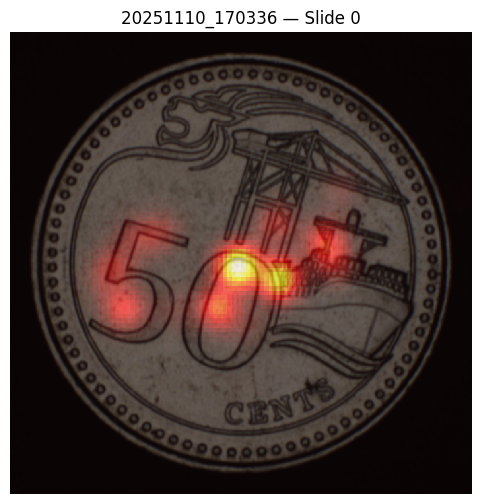

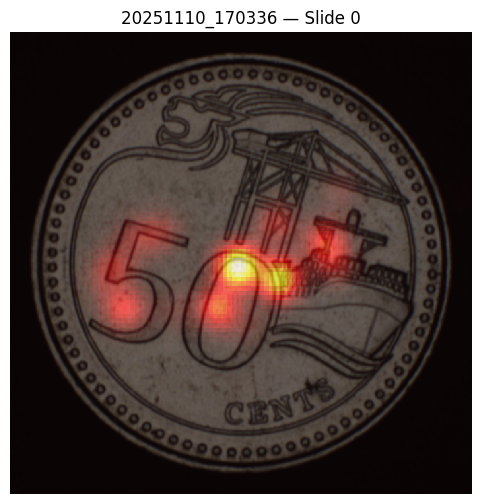

In [3]:
# Assuming you already have the data
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = HeatmapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global heatmap statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# --- Plot heatmap for one image ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']}",
)


▶ Global focus map statistics


,avg_gaze_x,avg_gaze_y,gaze_count
0,-10.843082,-13.075658,549


▶ Per-set statistics


,set_name,avg_gaze_x,avg_gaze_y,gaze_count
0,20251110_170336,-10.843082,-13.075658,549


▶ Per-slide statistics


,set_name,slide_index,avg_gaze_x,avg_gaze_y,gaze_count
0,20251110_170336,0,-10.843082,-13.075658,549


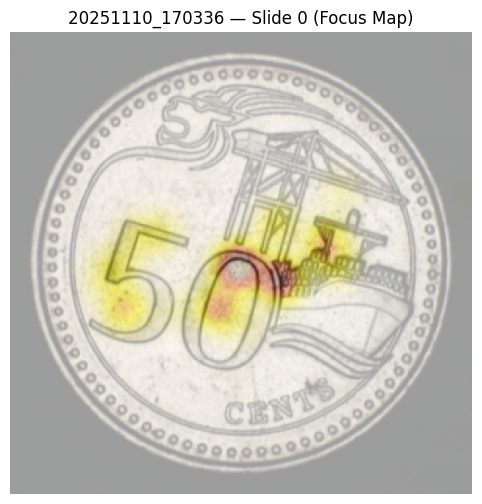

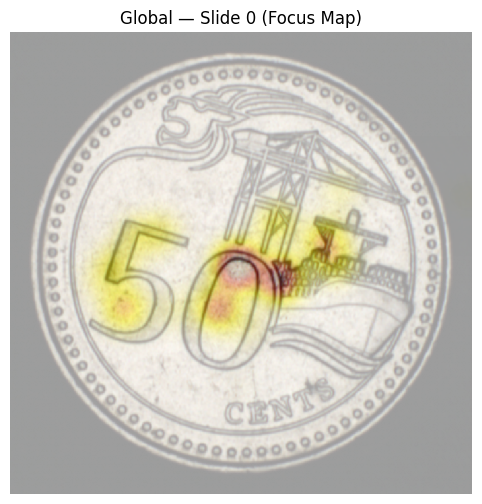

In [4]:
# --- Prepare background data ---
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

analyzer = FocusMapAnalyzer(output_folder=output_dir)

# --- Global ---
print("▶ Global focus map statistics")
global_stats = analyzer.analyze(background_data, per="global")
display(global_stats)

# --- Set-level ---
print("▶ Per-set statistics")
set_stats = analyzer.analyze(background_data, per="set")
display(set_stats.head())

# --- Slide-level ---
print("▶ Per-slide statistics")
slide_stats = analyzer.analyze(background_data, per="slide")
display(slide_stats.head())

# ============================================================
# 🖼 Plot focus map for one example slide
# ============================================================

example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

# --- Focus map for single slide (individual subject) ---
analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"{example_slide['set_name']} — Slide {example_slide['slide_index']} (Focus Map)",
)

# --- Focus map using all gaze data for this slide (across subjects) ---
analyzer.plot_analysis(
    background_data=background_data,
    screenshot_path=screenshot_path,
    title=f"Global — Slide {example_slide['slide_index']} (Focus Map)",
)

▶ Detecting saccades...


,set_name,slide_index,start_time,end_time,duration,x_start,y_start,x_end,y_end,amplitude,peak_velocity,mean_velocity,mean_acceleration
0,20251110_170336,0,34.650641,34.682157,0.047826,-17.244461,-1.928687,-9.412857,3.466759,9.510250,388.266415,210.326245,9369.815787
1,20251110_170336,0,34.713769,34.713769,0.015931,-6.925095,4.777079,-5.906044,4.018521,1.270383,79.744339,79.744339,6250.143557
2,20251110_170336,0,34.762755,34.762755,0.016609,-5.875282,2.155151,-5.151604,0.702467,1.622961,97.714585,97.714585,2840.216665
3,20251110_170336,0,34.794403,34.794403,0.016278,-3.698410,2.275343,-3.296906,0.897474,1.435175,88.165474,88.165474,3143.333702
4,20251110_170336,0,34.888947,34.906990,0.033531,-8.476044,-1.520720,-11.230843,-0.739732,2.863365,258.927656,189.449429,9985.971961


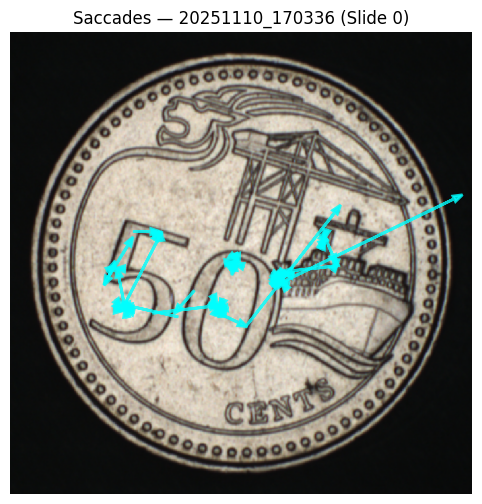

In [5]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

saccade_analyzer = SaccadeAnalyzer(
    output_folder=output_dir,
    method="ivt",               # "ivt" (velocity-based) or "acceleration"
    velocity_threshold=120.0,   # pixels/sec
    acceleration_threshold=6000.0,  # pixels/sec^2
    min_duration=0.015,         # seconds
)

print("▶ Detecting saccades...")
saccades = saccade_analyzer.analyze(background_data)
display(saccades.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

saccade_analyzer.plot_analysis(
    saccades=saccades,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Saccades — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Detecting fixations...


,fix_start,fix_end,duration,x_mean,y_mean,dispersion,set_name,slide_index
0,34.618624,35.137013,0.518388,-11.736467,-2.356049,125.686523,20251110_170336,0
1,35.153939,35.304183,0.150245,-115.278850,-76.868011,112.836233,20251110_170336,0
2,35.320607,35.497693,0.177087,-191.748207,-64.748025,69.271688,20251110_170336,0
3,35.513911,35.928675,0.414763,-206.205621,-6.125972,62.614174,20251110_170336,0
4,35.945117,36.106800,0.161684,-220.149554,-28.301933,94.267367,20251110_170336,0


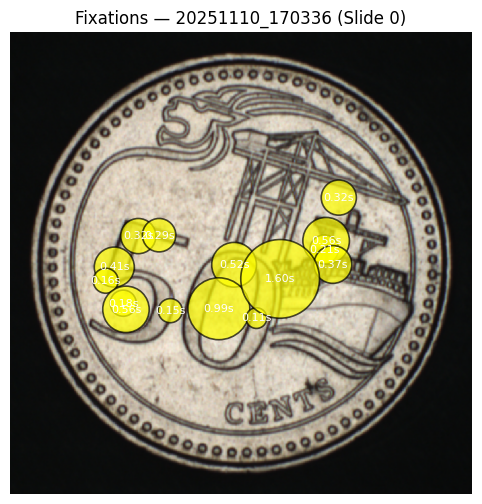

In [6]:
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

fixation_analyzer = FixationAnalyzer(
    output_folder=output_dir,
    method="dispersion",           # or "velocity"
    dispersion_threshold=60.0,     # pixels
    min_duration=0.08,             # seconds
)

print("▶ Detecting fixations...")
fixations = fixation_analyzer.analyze(background_data)
display(fixations.head())

example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

fixation_analyzer.plot_analysis(
    fixations=fixations,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Fixations — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Performing gaze clustering...


,set_name,slide_index,screenshot_file,input_data,classification,user_classification,model_prediction,voice_file,voice_start_timestamp,event_type,...,gaze_x_left,gaze_y_left,gaze_x_right,gaze_y_right,pupil_left,pupil_right,avg_gaze_x,avg_gaze_y,avg_pupil_size,cluster
0,20251110_170336,0,output\20251110_170336\CAM3-20250304 180908474...,datasets/pdt\good\CAM3-20250304 180908474.bmp,good,exit,[],NaN,NaN,BinocularEyeSampleEventNT,...,16.441864,-37.456455,74.057190,-42.399387,5.140778,4.925552,45.249527,-39.927921,5.033165,0
1,20251110_170336,0,output\20251110_170336\CAM3-20250304 180908474...,datasets/pdt\good\CAM3-20250304 180908474.bmp,good,exit,[],NaN,NaN,BinocularEyeSampleEventNT,...,34.356812,48.514566,62.244141,49.075012,5.133789,4.908432,48.300476,48.794789,5.021111,1
2,20251110_170336,0,output\20251110_170336\CAM3-20250304 180908474...,datasets/pdt\good\CAM3-20250304 180908474.bmp,good,exit,[],NaN,NaN,BinocularEyeSampleEventNT,...,42.534851,48.738899,62.684784,48.025904,5.127304,4.912491,52.609818,48.382401,5.019897,1
3,20251110_170336,0,output\20251110_170336\CAM3-20250304 180908474...,datasets/pdt\good\CAM3-20250304 180908474.bmp,good,exit,[],NaN,NaN,BinocularEyeSampleEventNT,...,51.627686,62.354565,56.035950,53.422251,5.115021,4.917572,53.831818,57.888408,5.016296,1
4,20251110_170336,0,output\20251110_170336\CAM3-20250304 180908474...,datasets/pdt\good\CAM3-20250304 180908474.bmp,good,exit,[],NaN,NaN,BinocularEyeSampleEventNT,...,54.271820,59.578371,49.446442,52.117910,5.121704,4.918457,51.859131,55.848141,5.020081,1


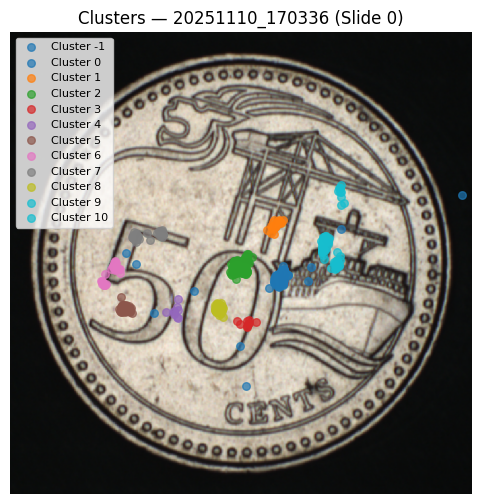

In [7]:
# ==============================================
# 👁️ Cluster Analyzer Demo
# ==============================================
from pathlib import Path
import pandas as pd

background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

# Instantiate analyzer (DBSCAN by default)
cluster_analyzer = ClusterAnalyzer(
    output_folder=output_dir,
    eps=20,              # pixel distance for clustering
    min_samples=3,        # minimum points per cluster
)

print("▶ Performing gaze clustering...")
clustered_data = cluster_analyzer.analyze(background_data)
display(clustered_data.head())

# --- Visualization for one slide ---
example_slide = background_data.iloc[0]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

cluster_analyzer.plot_analysis(
    background_data=clustered_data,
    screenshot_path=screenshot_path,
    set_name=example_slide["set_name"],
    slide_index=example_slide["slide_index"],
    title=f"Clusters — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)

▶ Slide-level entropy


,entropy,convex_hull_area,num_points,set_name,slide_index
0,7.374397,99549.331466,549,20251110_170336,0


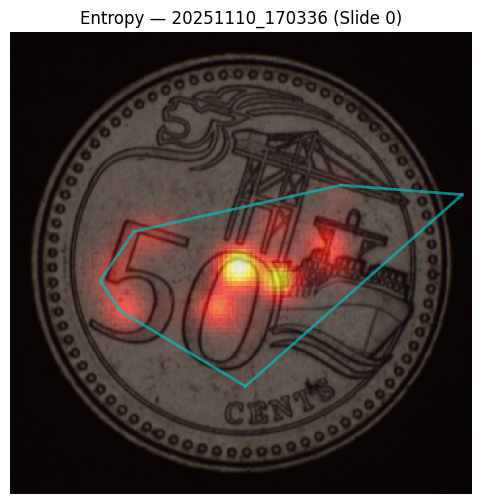

In [8]:
# ==============================================
# 🧠 Entropy Analyzer Demo
# ==============================================
background_data = pd.concat(loader.get_all_data(flatten=True).values(), ignore_index=True)
output_dir = Path("./analysis_outputs")

entropy_analyzer = EntropyAnalyzer(output_folder=output_dir)

print("▶ Slide-level entropy")
entropy_results = entropy_analyzer.analyze(background_data, per="slide", bins=100, use_convex_hull=True)
display(entropy_results.head())

# --- Visualization for one example slide ---
example_slide = background_data.iloc[0]
subset = background_data[
    (background_data["set_name"] == example_slide["set_name"]) &
    (background_data["slide_index"] == example_slide["slide_index"])
]
screenshot_path = Path(loader.root) / example_slide["screenshot_file"]

entropy_analyzer.plot_analysis(
    background_data=subset,
    screenshot_path=screenshot_path,
    title=f"Entropy — {example_slide['set_name']} (Slide {example_slide['slide_index']})",
)
